# Continuidad

## Continuidad para funciones de dos variables

````{prf:definition} Definición de continuidad de una función de dos variables
:label: def_cont_2v
:nonumber: 

Sea $D \subset \mathbb{R}^2$, $(x_0,y_0) \in D$. Diremos que **$f$ es continua en el punto $(x_0,y_0)$** si y sólo si existe 
el límite en ese punto y es igual al valor de la función en el mismo. Es decir, 

$$
\exists\lim_{(x,y) \rightarrow (x_0,y_0)} f(x,y) \textrm{ y, además, } \lim_{(x,y) \rightarrow (x_0,y_0)} f(x,y) = f(x_0,y_0).
$$

Diremos que la función $f$ es continua si y sólo si es continua en todos los puntos de $D$.
````

Por lo tanto, la función $f$ es discontinua cuando no es continua en al menos un punto de $D$. Hay dos tipos de discontinuidades: evitable e inevitable. 

* La función **$f$ tiene una discontinuidad evitable en $(x_0,y_0)$** si existe $\displaystyle \lim_{(x,y) \rightarrow (x_0,y_0)} f(x,y)$ y se cumple alguna de las siguientes condiciones: 
    
    * no existe $f(x_0,y_0)$, o 
    * $\displaystyle \lim_{(x,y) \rightarrow (x_0,y_0)} f(x,y) \neq f(x_0,y_0)$. 

* La función **$f$ tiene una discontinuidad inevitable en $(x_0,y_0)$** si no existe $\displaystyle \lim_{(x,y) \rightarrow (x_0,y_0)} f(x,y)$. 

````{prf:example}  
:label: 2.3._ex
:nonumber: 

1. La función $\displaystyle f(x,y) = \frac{5x^2y}{x^2+y^2}$ tiene una discontinuidad evitable en $(0,0)$. 
    Como el límite en ese punto existe, se puede eliminar esa discontinuidad redefiniendo $f$ como: 

    $$
    \hat{f}(x,y)=
    \begin{cases}
    \displaystyle \frac{5x^2y}{x^2+y^2}  & \text{si } (x,y)\neq(0,0),\\
    0 & \text{si } (x,y)=(0,0).
    \end{cases}
    $$

2. La función $\displaystyle f(x,y) = \left(\frac{x^2-y^2}{x^2+y^2}\right)^2$ no es continua en $(0,0)$, y esta discontinuidad es inevitable (reto: ¿por qué?).
````

````{prf:property} Operaciones con funciones de varias variables 
:label: pr_operaciones
:nonumber: 

Sean $f, g: D \subset \mathbb{R}^{2} \rightarrow \mathbb{R}$ funciones continuas en un punto $(x_0,y_0) \in D$. Entonces las siguientes funciones también son continuas en $(x_0,y_0)$:

* **Múltiplo escalar**: $\lambda f$, $\forall \lambda \in \mathbb{R}$.
* **Suma y diferencia**: $f \pm g$.
* **Producto**: $fg$.
* **Cociente**: $\dfrac{f}{g}$, si $g(x_0,y_0) \neq 0$.
````

````{prf:theorem} Continuidad de una función compuesta
:label: th_func_comp_cont
:nonumber: 
Sean $f: D \subset \mathbb{R}^{2} \rightarrow \mathbb{R}$ y $g: E \subset \mathbb{R} \rightarrow \mathbb{R}$ dos funciones tales que $f(D) \subset E$. Sea $(x_0,y_0) \in D$ tal que $f$ es continua en $(x_0,y_0)$ y $g$ es continua en $f(x_0,y_0)$. Entonces la función compuesta $(g \circ f)(x,y) = g(f(x,y))$ es continua en $(x_0,y_0)$. Es decir, 

$$
\displaystyle \lim_{(x,y) \rightarrow (x_0,y_0)} g(f(x,y)) = g(f(x_0,y_0)).
$$
````

Estos resultados teóricos son muy útiles, pues a partir de ellos se obtiene la continuidad de polinomios y funciones racionales de varias variables. Además, establecen la continuidad de otro tipo de funciones conocidas. 

Por ejemplo, a partir de ellos es inmediato probar que las funciones $\displaystyle f(x,y) = \frac{1}{2}\sin(x^2+y^2)$ y $\displaystyle g(x,y) = \cos(y^2)e^{-\sqrt{x^2+y^2}}$ son continuas. 

Vamos a utilizar `Python` para visualizar sus representaciones gráficas.

In [2]:
import sympy as sp
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

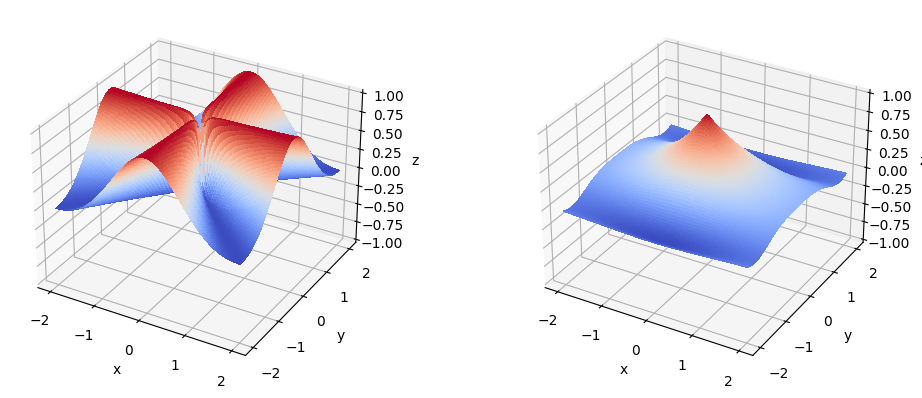

In [5]:
x, y = sp.symbols('x, y', real=True) # definimos las variables simbólicas x e y  

# f = sp.lambdify((x,y),sp.sin(x**2 + y**2)/2) # función NumPy de f
# f = sp.lambdify((x,y), (x-2*y)/(x**2+y**2))
f = sp.lambdify((x,y), ((x**2-y**2)/(x**2+y**2))**2)
g = sp.lambdify((x,y),sp.cos(y**2)*sp.exp(-sp.sqrt(x**2+y**2))) # función NumPy de g

# Inicialización de la representación 3D
fig = plt.figure(figsize=plt.figaspect(0.4))
ax1, ax2 = fig.add_subplot(1, 2, 1, projection='3d'), fig.add_subplot(1, 2, 2, projection='3d')

# Creación de la nube de puntos (x,y) en [-2,2]x[-2,2] (100 puntos en cada eje, x e y) 
xx, yy = np.linspace(-2, 2, 100), np.linspace(-2, 2, 100)
xx, yy = np.meshgrid(xx, yy)
ff, gg = f(xx,yy), g(xx,yy)

# Representación de f
ax1.plot_surface(xx, yy, ff, rstride=1, cstride=1, cmap=cm.coolwarm, antialiased=False) 
ax1.set_xlabel('x'), ax1.set_ylabel('y'), ax1.set_zlabel('z'), ax1.set_zlim([-1,1])

# Representación de g
ax2.plot_surface(xx, yy, gg, rstride=1, cstride=1, cmap=cm.coolwarm, antialiased=False) 
ax2.set_xlabel('x'), ax2.set_ylabel('y'), ax2.set_zlabel('z'), ax2.set_zlim([-1,1])

plt.show()

¡Sigamos practicando! 

````{prf:example}
:label: ex_cont_3v
:nonumber:

Analiza la continuidad de

* $\displaystyle f(x,y) = \frac{x-2y}{x^2+y^2}$,
* $\displaystyle g(x,y) = \frac{2}{y-x^2}$.

**Solución:**

Las funciones racionales $f$ y $g$ son continuas, excepto en los puntos en los que el denominador es $0$. Estos puntos son los dados, respectivamente, por las ecuaciones:

1. $\displaystyle x^2+y^2 = 0$. Lo que implica que $f$ es continua en cada punto del plano $XY$, excepto en el origen, $(0,0)$. 

2. $\displaystyle y-x^2 = 0$. Lo que implica que $g$ es continua en todos los puntos, excepto en los situados sobre la parábola $y = x^2$.
````

## Continuidad para funciones de tres variables

````{prf:definition} Definición de continuidad de una función de tres variables
:label: def_cont_3v
:nonumber: 

Sea $D \subset \mathbb{R}^3$, $(x_0,y_0,z_0) \in D$. Diremos que **$f$ es continua en el punto $(x_0,y_0,z_0)$**  
si y sólo si existe el límite en ese punto y es igual al valor de la función en el mismo. Es decir, 

$$
\exists\lim_{(x,y,z) \rightarrow (x_0,y_0,z_0)} f(x,y,z) \textrm{ y, además, } 
\lim_{(x,y,z) \rightarrow (x_0,y_0,z_0)} f(x,y,z) = f(x_0,y_0,z_0).
$$

Diremos que la función $f$ es continua si y sólo si es continua en todos los puntos de $D$.
````

¡A practicar!

````{prf:example}
:label: ex_cont_3v
:nonumber:

Analiza la continuidad de la siguiente función:

$$
f(x,y,z) = \frac{1}{x^2+y^2-z}
$$

**Solución:**

La función $f$ es continua excepto en los puntos en los que el denominador es $0$, que son los dados por la ecuación:

$$
x^2+y^2-z = 0,
$$

así que $f$ es continua en cada punto del espacio, excepto en los puntos del paraboloide elíptico

$$
z = x^2+y^2.
$$

````